# Telecom Company - Customer Churn Prediction

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

Load the Dataset (Sample Data Set containing Telco customer data and showing customers left last month)

In [2]:
telco_data = pd.read_csv('C:\\Users\\DELL\\Desktop\\DA\\Machine Learning Projects\\Datasets\\Telco-Customer-Churn Data.csv')

In [3]:
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
telco_data.shape

(7043, 21)

In [5]:
telco_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
telco_data.dtypes

customerID           object
gender               object
SeniorCitizen       float64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
telco_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7042.000000,7039.000000,7037.000000
mean,0.161886,32.381872,64.737587
std,0.368372,24.548447,30.083448
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.450000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


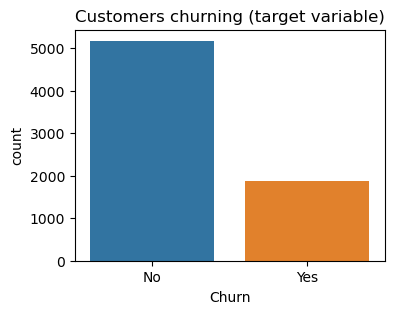

In [8]:
plt.figure(figsize=(4,3))
sns.countplot(x=telco_data.Churn)
plt.title('Customers churning (target variable)')
plt.show()

In [9]:
(telco_data['Churn'].value_counts()/len(telco_data['Churn']))*100

No     73.49141
Yes    26.50859
Name: Churn, dtype: float64

Highly imbalance data with Yes to No ratio 27:73

In [10]:
telco_data['Churn'].value_counts()

No     5176
Yes    1867
Name: Churn, dtype: int64

In [11]:
telco_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7040 non-null   object 
 2   SeniorCitizen     7042 non-null   float64
 3   Partner           7040 non-null   object 
 4   Dependents        7039 non-null   object 
 5   tenure            7039 non-null   float64
 6   PhoneService      7042 non-null   object 
 7   MultipleLines     7042 non-null   object 
 8   InternetService   7040 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7040 non-null   object 
 11  DeviceProtection  7039 non-null   object 
 12  TechSupport       7041 non-null   object 
 13  StreamingTV       7042 non-null   object 
 14  StreamingMovies   7041 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7041 non-null   object 


# Data Cleaning

###### Missing value treatment

In [12]:
telco_data.isnull().sum()

customerID          0
gender              3
SeniorCitizen       1
Partner             3
Dependents          4
tenure              4
PhoneService        1
MultipleLines       1
InternetService     3
OnlineSecurity      0
OnlineBackup        3
DeviceProtection    4
TechSupport         2
StreamingTV         1
StreamingMovies     2
Contract            0
PaperlessBilling    2
PaymentMethod       3
MonthlyCharges      6
TotalCharges        2
Churn               0
dtype: int64

In [13]:
(telco_data.isnull().sum()/telco_data.shape[0])*100

customerID          0.000000
gender              0.042595
SeniorCitizen       0.014198
Partner             0.042595
Dependents          0.056794
tenure              0.056794
PhoneService        0.014198
MultipleLines       0.014198
InternetService     0.042595
OnlineSecurity      0.000000
OnlineBackup        0.042595
DeviceProtection    0.056794
TechSupport         0.028397
StreamingTV         0.014198
StreamingMovies     0.028397
Contract            0.000000
PaperlessBilling    0.028397
PaymentMethod       0.042595
MonthlyCharges      0.085191
TotalCharges        0.028397
Churn               0.000000
dtype: float64

In [14]:
telco_data.fillna(method='ffill',inplace=True) #forward filling the missing values

In [15]:
telco_data.isnull().sum() # no missing values present

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

###### Duplicate value treatment

In [16]:
telco_data.shape

(7043, 21)

In [17]:
telco_data.duplicated().sum()

10

In [18]:
tel_data=telco_data.drop_duplicates()

In [19]:
tel_data[tel_data.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [20]:
tel_data.duplicated().sum()

0

In [21]:
tel_data.shape

(7033, 21)

###### fixing the datatype

In [22]:
tel_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:
tel_data.dtypes

customerID           object
gender               object
SeniorCitizen       float64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [24]:
tel_data.TotalCharges = pd.to_numeric(tel_data.TotalCharges, errors='coerce')
tel_data.isnull().sum()

C:\Users\DELL\AppData\Local\Temp\ipykernel_7540\877129494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tel_data.TotalCharges = pd.to_numeric(tel_data.TotalCharges, errors='coerce')


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [25]:
tel_data.TotalCharges.fillna(tel_data.TotalCharges.mean(),inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_7540\2041744813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tel_data.TotalCharges.fillna(tel_data.TotalCharges.mean(),inplace=True)


In [26]:
tel_data.dtypes

customerID           object
gender               object
SeniorCitizen       float64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [27]:
tel_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

###### Removing columns not required for processing

In [28]:
tel_data.drop(['customerID'],axis=1,inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_7540\1466272551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tel_data.drop(['customerID'],axis=1,inplace=True)


In [29]:
tel_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Exploration

### 1. Each column wise analysis wrt Churn

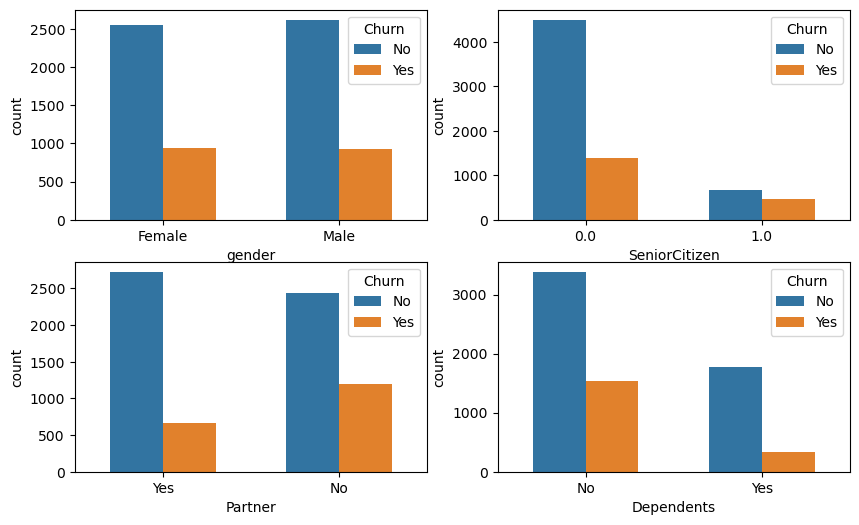

In [30]:
plt.figure(figsize=((10,6)))
plt.subplot(2,2,1)
sns.countplot(data=tel_data, width = 0.6, x='gender', hue='Churn')
plt.subplot(2,2,2)
sns.countplot(data=tel_data, width = 0.6, x='SeniorCitizen', hue='Churn')
plt.subplot(2,2,3)
sns.countplot(data=tel_data, width = 0.6, x='Partner', hue='Churn')
plt.subplot(2,2,4)
sns.countplot(data=tel_data, width = 0.6, x='Dependents', hue='Churn')
plt.show()

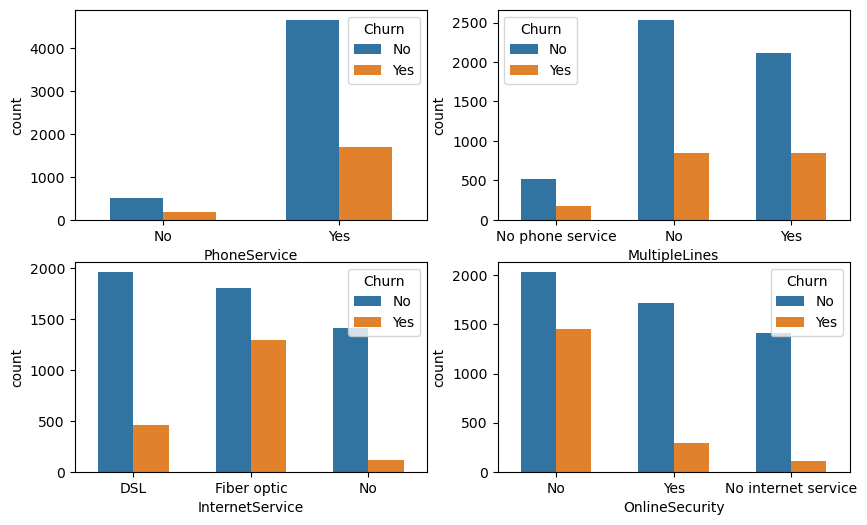

In [31]:
plt.figure(figsize=((10,6)))
plt.subplot(2,2,1)
sns.countplot(data=tel_data, width = 0.6, x='PhoneService', hue='Churn')
plt.subplot(2,2,2)
sns.countplot(data=tel_data, width = 0.6, x='MultipleLines', hue='Churn')
plt.subplot(2,2,3)
sns.countplot(data=tel_data, width = 0.6, x='InternetService', hue='Churn')
plt.subplot(2,2,4)
sns.countplot(data=tel_data, width = 0.6, x='OnlineSecurity', hue='Churn')
plt.show()

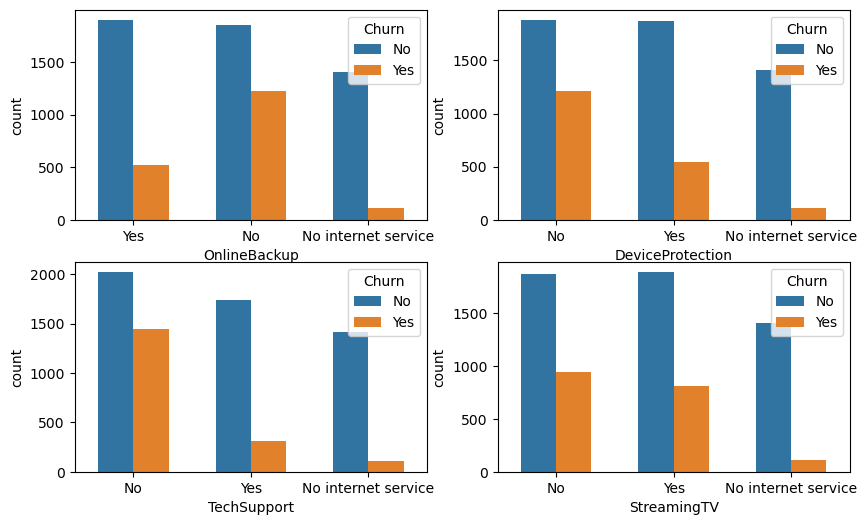

In [32]:
plt.figure(figsize=((10,6)))
plt.subplot(2,2,1)
sns.countplot(data=tel_data, width = 0.6, x='OnlineBackup', hue='Churn')
plt.subplot(2,2,2)
sns.countplot(data=tel_data, width = 0.6, x='DeviceProtection', hue='Churn')
plt.subplot(2,2,3)
sns.countplot(data=tel_data, width = 0.6, x='TechSupport', hue='Churn')
plt.subplot(2,2,4)
sns.countplot(data=tel_data, width = 0.6, x='StreamingTV', hue='Churn')
plt.show()

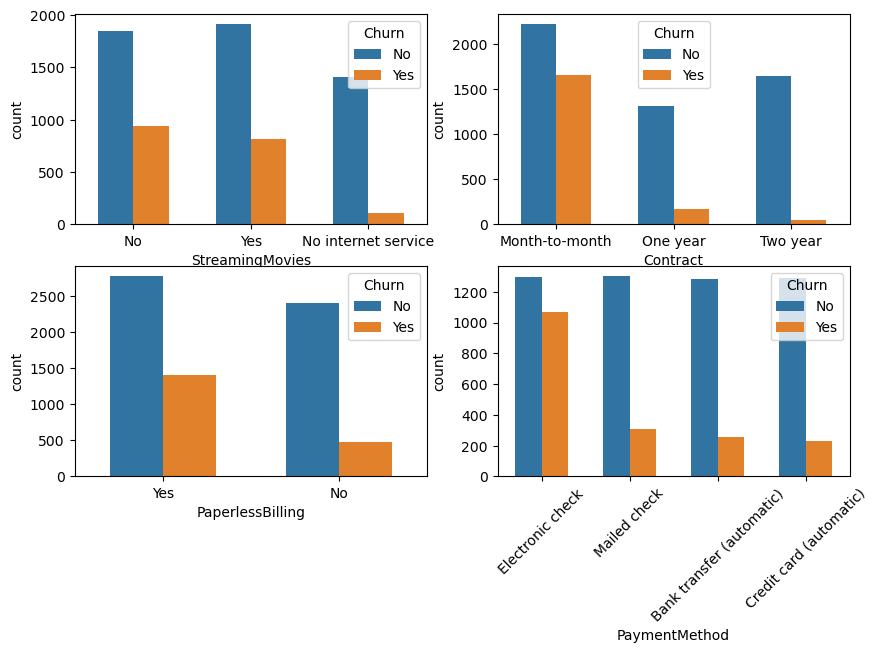

In [33]:
plt.figure(figsize=((10,6)))
plt.subplot(2,2,1)
sns.countplot(data=tel_data, width = 0.6, x='StreamingMovies', hue='Churn')
plt.subplot(2,2,2)
sns.countplot(data=tel_data, width = 0.6, x='Contract', hue='Churn')
plt.subplot(2,2,3)
sns.countplot(data=tel_data, width = 0.6, x='PaperlessBilling', hue='Churn')
plt.subplot(2,2,4)
sns.countplot(data=tel_data, width = 0.6, x='PaymentMethod', hue='Churn')
plt.xticks(rotation=45)
plt.show()

### 2. Converting the target variable 'Churn' in a binary values: Yes=1 ; No = 0

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le=LabelEncoder()

In [36]:
tel_data.Churn=le.fit_transform(tel_data.Churn)
tel_data.gender=le.fit_transform(tel_data.gender)
tel_data.Partner=le.fit_transform(tel_data.Partner)
tel_data.Dependents=le.fit_transform(tel_data.Dependents)
tel_data.PhoneService=le.fit_transform(tel_data.PhoneService)
tel_data.MultipleLines=le.fit_transform(tel_data.MultipleLines)
tel_data.InternetService=le.fit_transform(tel_data.InternetService)
tel_data.OnlineSecurity=le.fit_transform(tel_data.OnlineSecurity)
tel_data.OnlineBackup=le.fit_transform(tel_data.OnlineBackup)
tel_data.DeviceProtection=le.fit_transform(tel_data.DeviceProtection)
tel_data.TechSupport=le.fit_transform(tel_data.TechSupport)
tel_data.StreamingTV=le.fit_transform(tel_data.StreamingTV)
tel_data.StreamingMovies=le.fit_transform(tel_data.StreamingMovies)
tel_data.PaperlessBilling=le.fit_transform(tel_data.PaperlessBilling)

C:\Users\DELL\AppData\Local\Temp\ipykernel_7540\2736277944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tel_data.Churn=le.fit_transform(tel_data.Churn)
C:\Users\DELL\AppData\Local\Temp\ipykernel_7540\2736277944.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tel_data.gender=le.fit_transform(tel_data.gender)
C:\Users\DELL\AppData\Local\Temp\ipykernel_7540\2736277944.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [37]:
tel_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0.0,1,0,1.0,0,1,0,0,2,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0.0,0,0,34.0,1,0,0,2,0,2,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0.0,0,0,2.0,1,0,0,2,2,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0.0,0,0,45.0,0,1,0,2,0,2,2,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0.0,0,0,2.0,1,0,1,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


### 3. Convert all the categorical variables into dummy variables

In [38]:
tel_data_dummies = pd.get_dummies(tel_data)
tel_data_dummies.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0.0,1,0,1.0,0,1,0,0,2,...,29.85,29.85,0,1,0,0,0,0,1,0
1,1,0.0,0,0,34.0,1,0,0,2,0,...,56.95,1889.50,0,0,1,0,0,0,0,1
2,1,0.0,0,0,2.0,1,0,0,2,2,...,53.85,108.15,1,1,0,0,0,0,0,1
3,1,0.0,0,0,45.0,0,1,0,2,0,...,42.30,1840.75,0,0,1,0,1,0,0,0
4,0,0.0,0,0,2.0,1,0,1,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0


### Relationship between Monthly Charges and Total Charges

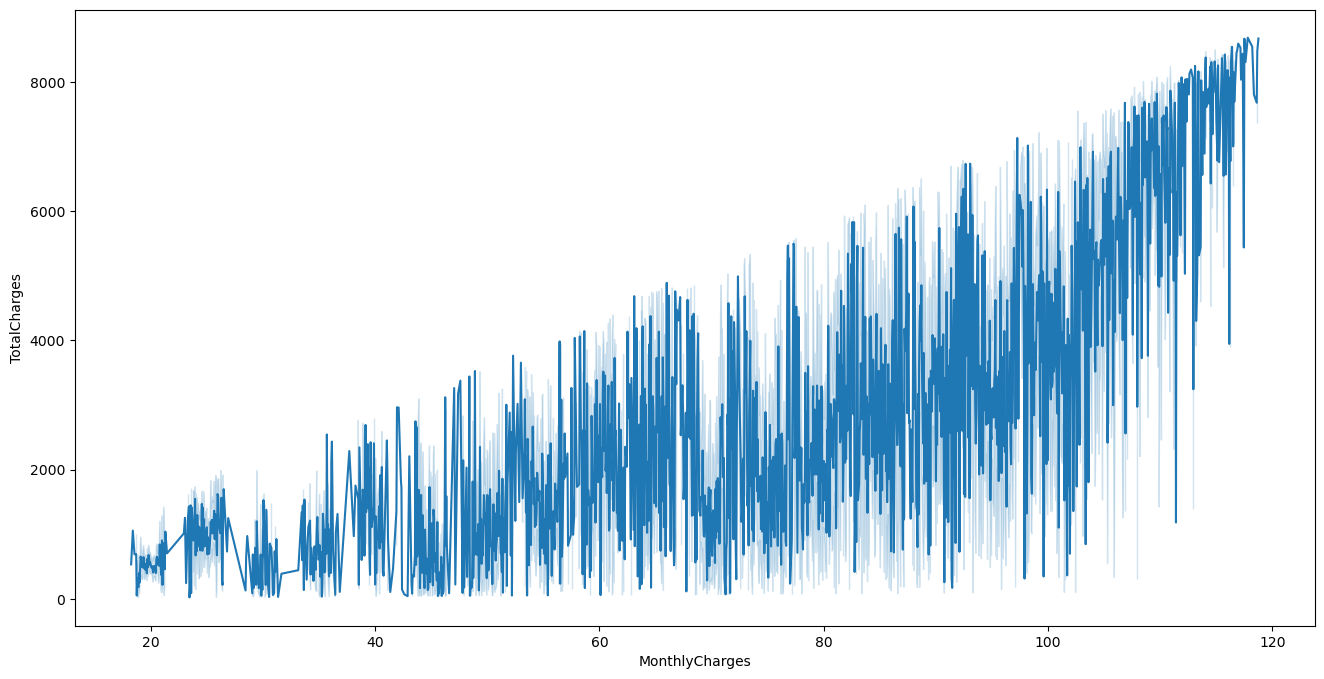

In [39]:
plt.figure(figsize=((16,8)))
sns.lineplot(data=tel_data_dummies, x='MonthlyCharges', y='TotalCharges')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_7540\1255726118.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(tel_data_dummies.MonthlyCharges[(tel_data_dummies["Churn"] == 0) ],
C:\Users\DELL\AppData\Local\Temp\ipykernel_7540\1255726118.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(tel_data_dummies.MonthlyCharges[(tel_data_dummies["Churn"] == 1) ],


Text(0.5, 1.0, 'Monthly charges by churn')

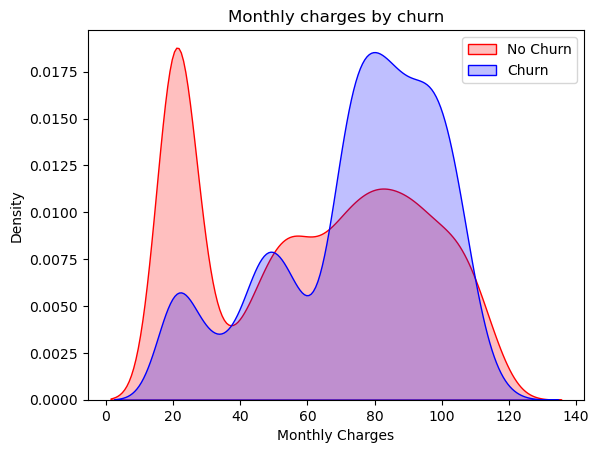

In [41]:
Mth = sns.kdeplot(tel_data_dummies.MonthlyCharges[(tel_data_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(tel_data_dummies.MonthlyCharges[(tel_data_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

C:\Users\DELL\AppData\Local\Temp\ipykernel_7540\3287198858.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(tel_data_dummies.TotalCharges[(tel_data_dummies["Churn"] == 0) ],
C:\Users\DELL\AppData\Local\Temp\ipykernel_7540\3287198858.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(tel_data_dummies.TotalCharges[(tel_data_dummies["Churn"] == 1) ],


Text(0.5, 1.0, 'Total charges by churn')

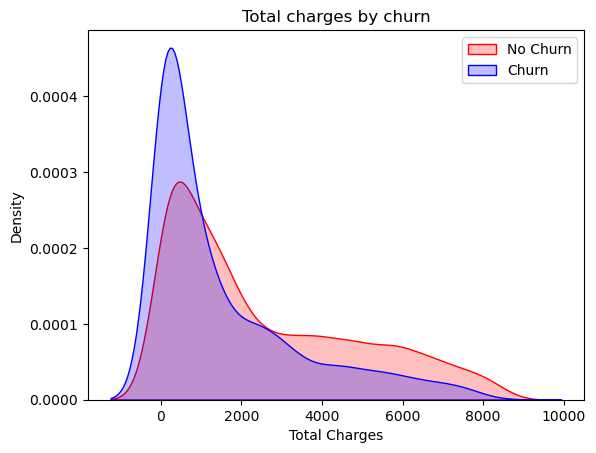

In [42]:
Tot = sns.kdeplot(tel_data_dummies.TotalCharges[(tel_data_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(tel_data_dummies.TotalCharges[(tel_data_dummies["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

In [43]:
tel_data_dummies.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
gender,1.000000,-0.001750,-0.001820,0.010722,0.005428,-0.005620,-0.005725,-0.001679,-0.015271,-0.012754,...,-0.012907,0.001151,-0.007807,-0.003075,0.007828,-0.003871,-0.016927,0.002049,0.000952,0.013597
SeniorCitizen,-0.001750,1.000000,0.018044,-0.210901,0.016497,0.009840,0.145526,-0.031698,-0.127627,-0.013076,...,0.220365,0.101439,0.150066,0.138714,-0.047041,-0.116675,-0.015656,-0.024084,0.170696,-0.152983
Partner,-0.001820,0.018044,1.000000,0.451508,0.378660,0.016742,0.142487,0.000100,0.150535,0.151743,...,0.096803,0.317924,-0.149422,-0.280694,0.083241,0.247468,0.109156,0.082129,-0.083343,-0.094331
Dependents,0.010722,-0.210901,0.451508,1.000000,0.158725,-0.002915,-0.025734,0.044445,0.151853,0.089992,...,-0.114931,0.062713,-0.163485,-0.231236,0.068845,0.203606,0.051451,0.060494,-0.150898,0.059736
tenure,0.005428,0.016497,0.378660,0.158725,1.000000,0.007399,0.342338,-0.030792,0.325388,0.370227,...,0.246748,0.823984,-0.352321,-0.644963,0.202262,0.558155,0.243618,0.233169,-0.208874,-0.233720
PhoneService,-0.005620,0.009840,0.016742,-0.002915,0.007399,1.000000,-0.020745,0.386945,-0.016387,0.023193,...,0.246492,0.111464,0.012901,0.000176,-0.002667,0.002333,0.007473,-0.008646,0.004215,-0.003624
MultipleLines,-0.005725,0.145526,0.142487,-0.025734,0.342338,-0.020745,1.000000,-0.109037,0.007046,0.116773,...,0.433160,0.452049,0.038459,-0.090802,-0.003968,0.109459,0.076926,0.063761,0.085188,-0.234156
InternetService,-0.001679,-0.031698,0.000100,0.044445,-0.030792,0.386945,-0.109037,1.000000,-0.028586,0.035800,...,-0.323362,-0.175536,-0.046784,-0.079255,-0.009599,0.101379,-0.017922,-0.032244,-0.091261,0.151947
OnlineSecurity,-0.015271,-0.127627,0.150535,0.151853,0.325388,-0.016387,0.007046,-0.028586,1.000000,0.184387,...,-0.054324,0.253568,-0.288484,-0.364297,0.124123,0.305863,0.099484,0.122021,-0.254323,0.068420
OnlineBackup,-0.012754,-0.013076,0.151743,0.089992,0.370227,0.023193,0.116773,0.035800,0.184387,1.000000,...,0.119459,0.374479,-0.194445,-0.279169,0.108450,0.221701,0.092374,0.097978,-0.133366,-0.037068


<Axes: >

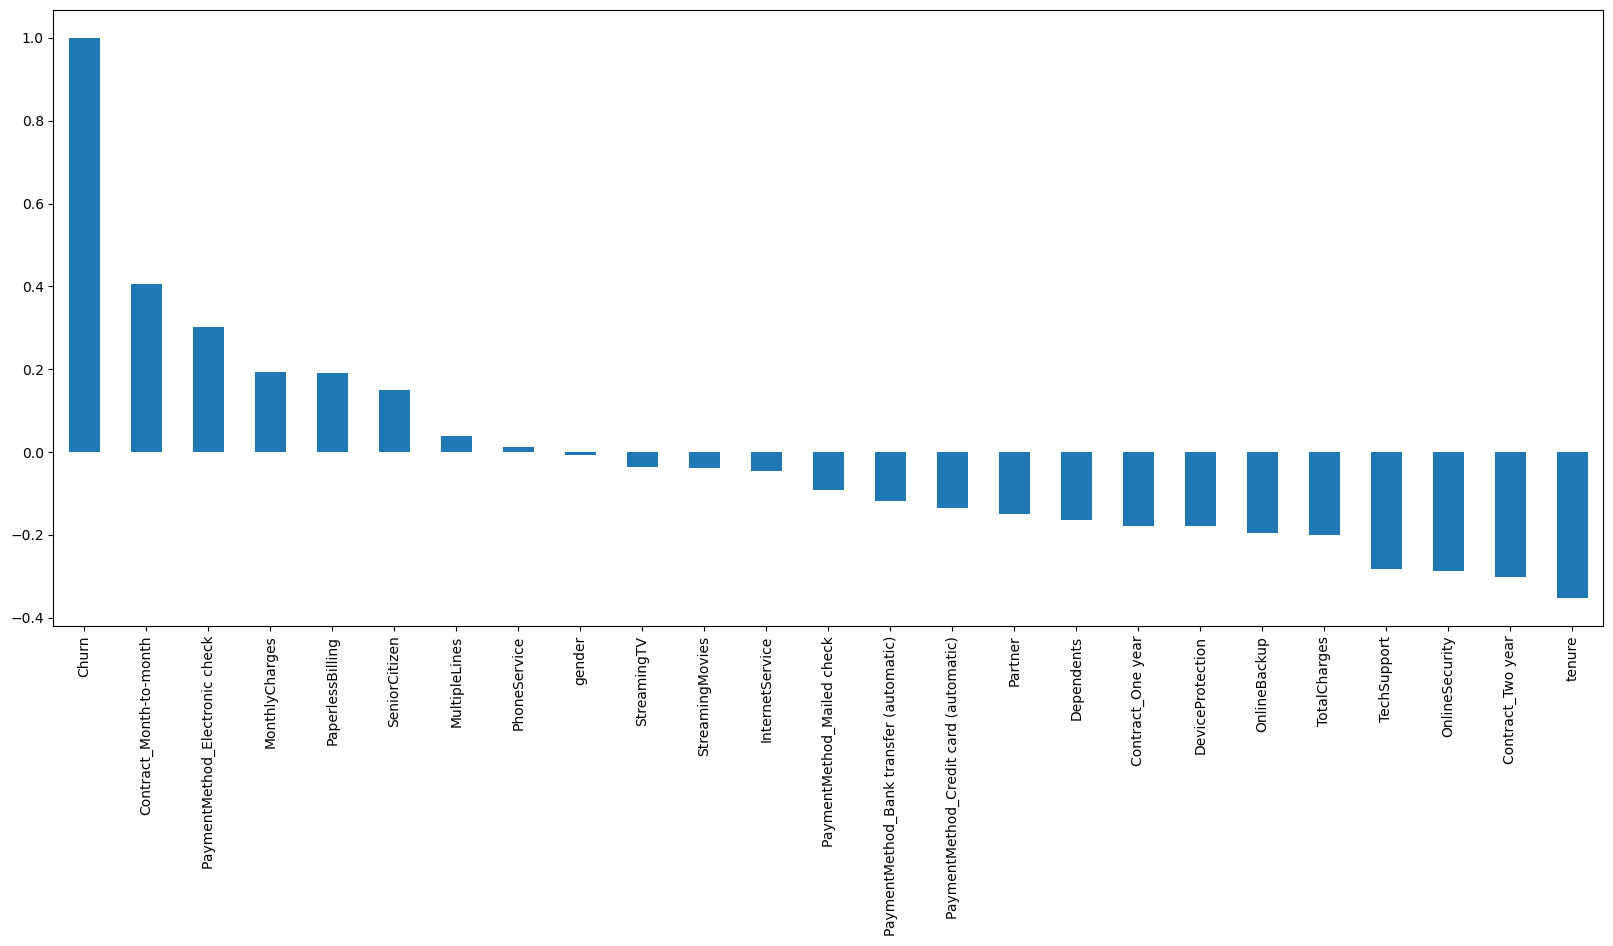

In [44]:
plt.figure(figsize=(20,8))
tel_data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

<Axes: >

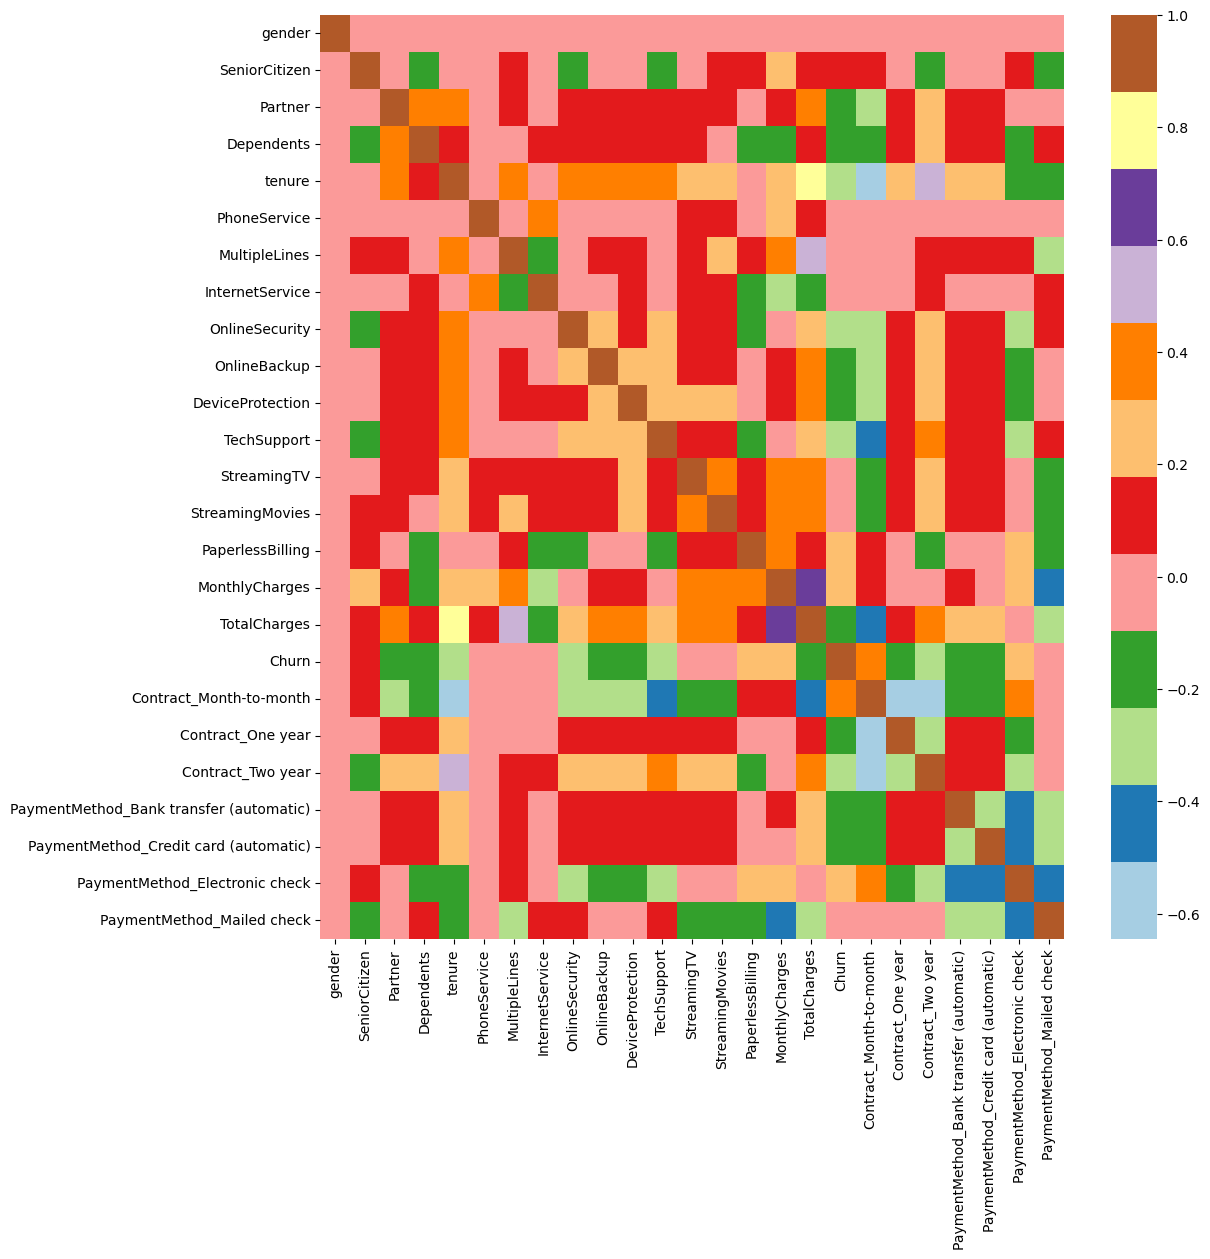

In [45]:
plt.figure(figsize=(12,12))
sns.heatmap(tel_data_dummies.corr(), cmap="Paired")

# Model Building

In [46]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [47]:
Y = tel_data_dummies['Churn']
X = tel_data_dummies.drop('Churn',axis=1)

In [48]:
# Split dataset into training set and test set
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state = 50)

### Decision Tree

In [91]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

In [92]:
clf

DecisionTreeClassifier()

In [93]:
# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

In [94]:
#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [95]:
clf.score(x_train,y_train)   #training Accuracy

0.9980447920369712

In [96]:
clf.score(x_test,y_test)    #testing Accuracy

0.7306325515280739

In [97]:
print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1028
           1       0.50      0.46      0.48       379

    accuracy                           0.73      1407
   macro avg       0.65      0.65      0.65      1407
weighted avg       0.72      0.73      0.73      1407



In [98]:
Y.value_counts()

0    5168
1    1865
Name: Churn, dtype: int64

## Accuracy is 74% because data is imbalanced.

In [99]:
from imblearn.over_sampling import RandomOverSampler

In [100]:
resamp=RandomOverSampler()

In [101]:
balx, baly = resamp.fit_resample(X,Y)

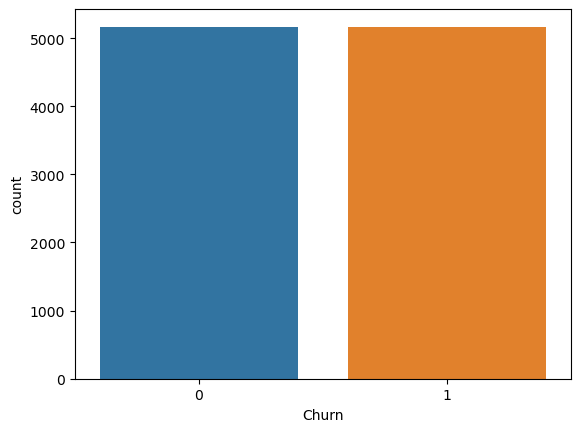

In [102]:
sns.countplot(x=baly)
plt.show()

#### Now data is balanced

In [103]:
balx_train,balx_test,baly_train,baly_test=train_test_split(balx, baly,test_size=0.2)

In [104]:
clf = DecisionTreeClassifier()

In [105]:
clf

DecisionTreeClassifier()

In [106]:
clf = clf.fit(balx_train,baly_train)

In [107]:
baly_pred = clf.predict(balx_test)

In [108]:
clf.score(balx_train,baly_train)   #training Accuracy

0.9977019835510401

In [109]:
clf.score(balx_test,baly_test)    #testing Accuracy

0.8704061895551257

In [110]:
print(metrics.classification_report(baly_pred,baly_test))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       910
           1       0.93      0.83      0.88      1158

    accuracy                           0.87      2068
   macro avg       0.87      0.88      0.87      2068
weighted avg       0.88      0.87      0.87      2068



In [112]:
print(metrics.confusion_matrix(baly_test, baly_pred))

[[840 198]
 [ 70 960]]


## Accuracy increased to 87% because of balancing data

KeyError: 17

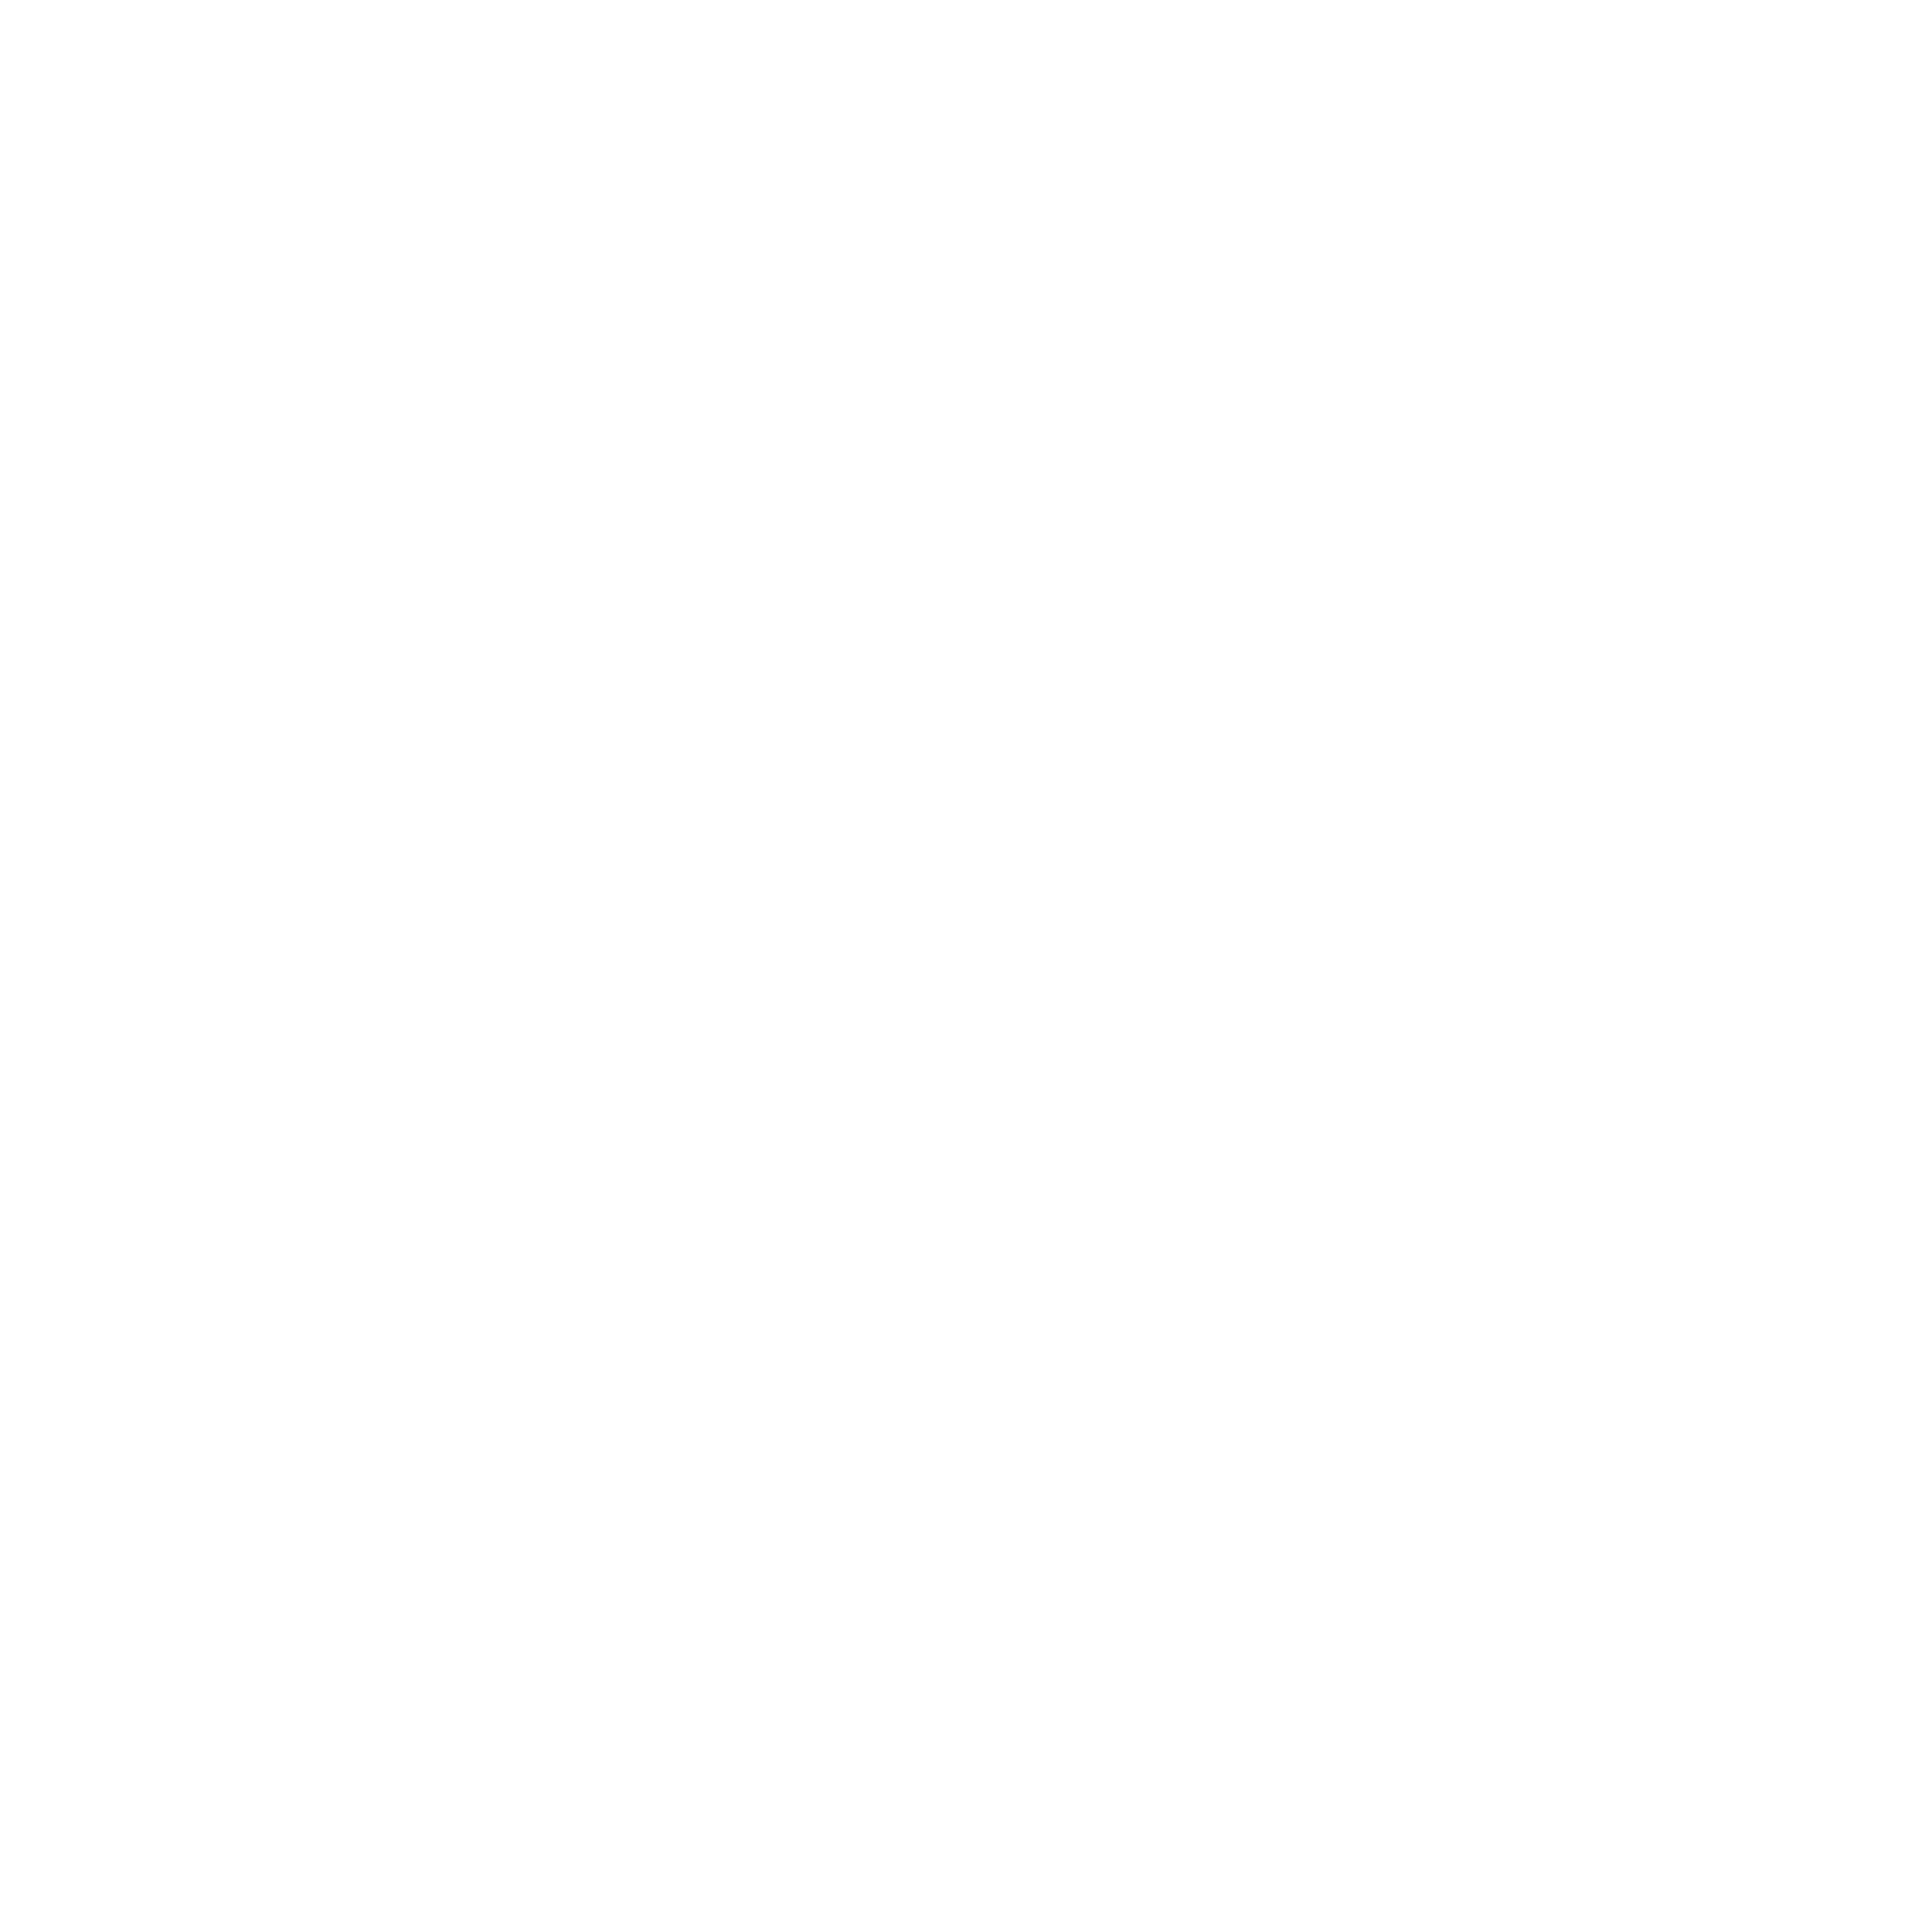

In [118]:
from sklearn import tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=600)
tree.plot_tree(clf,
               feature_names = balx, 
               class_names=['0','1'],
               filled = True);

fig.savefig('imagename.png')

### Random Forest

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [128]:
classifier= RandomForestClassifier(n_estimators=200)

In [129]:
classifier.fit(balx_train,baly_train)

RandomForestClassifier(n_estimators=200)

In [130]:
#prediction on test set
baly_pred=classifier.predict(balx_test)

In [131]:
print("Accuracy:",accuracy_score(baly_test,baly_pred))

Accuracy: 0.9018375241779497


In [132]:
print(classification_report(baly_test,baly_pred))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      1038
           1       0.87      0.95      0.91      1030

    accuracy                           0.90      2068
   macro avg       0.91      0.90      0.90      2068
weighted avg       0.91      0.90      0.90      2068



## Accuracy score is 90% through Random Forest

<Axes: >

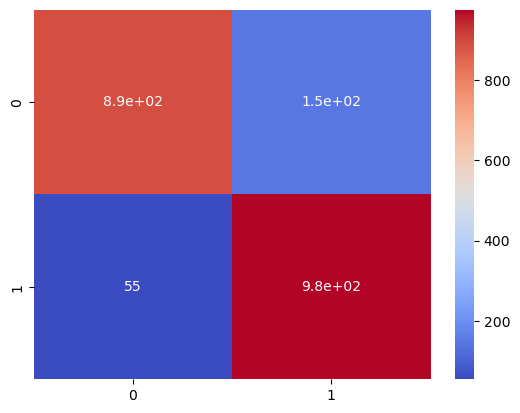

In [133]:
sns.heatmap(confusion_matrix(baly_test,baly_pred),yticklabels=True,cmap='coolwarm',annot=True)

### Logistic Regression

In [134]:
from sklearn.linear_model import LogisticRegression

In [135]:
lr=LogisticRegression()

In [136]:
lr.fit(balx_train,baly_train)

E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [141]:
pred1=lr.predict(balx_test)

In [142]:
print(classification_report(baly_test,pred1))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77      1038
           1       0.76      0.81      0.78      1030

    accuracy                           0.78      2068
   macro avg       0.78      0.78      0.78      2068
weighted avg       0.78      0.78      0.78      2068

